In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("teleCust1000t.csv")
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


1. The target field, called custcat, has four possible values that correspond to the four customer groups, as follows: 
    1. 1- Basic Service
    2. 2- E-Service
    3. 3- Plus Service
    4. 4- Total Service

In [3]:
target='custcat'
print("Null Values count:",df.isnull().sum().sum())
print("Categorical values Count:")
df[target].value_counts()

Null Values count: 0
Categorical values Count:


3    281
1    266
4    236
2    217
Name: custcat, dtype: int64

### Splitting Test and Train

In [4]:
x=df.drop([target],axis=1)
y=df[target]

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( x, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (800, 11) (800,)
Test set: (200, 11) (200,)


### Creating Model for Different distance metrics

In [6]:
from sklearn.neighbors import KNeighborsClassifier
k = 5
model_euclidean = KNeighborsClassifier(n_neighbors = k,metric='euclidean')
model_euclidean.fit(X_train,y_train)

model_minkowski = KNeighborsClassifier(n_neighbors = k,metric='hamming')
model_minkowski.fit(X_train,y_train)

model_manhattan = KNeighborsClassifier(n_neighbors = k,metric='manhattan')
model_manhattan.fit(X_train,y_train)

KNeighborsClassifier(metric='manhattan')

### Classification Report For Different Models

In [7]:
from sklearn.metrics import classification_report as cr
print("For euclidean:\n",cr(y_test,model_euclidean.predict(X_test)))
print("\n\nFor minkowski:\n",cr(y_test,model_minkowski.predict(X_test)))
print("\n\nFor manhattan:\n",cr(y_test,model_manhattan.predict(X_test)))

For euclidean:
               precision    recall  f1-score   support

           1       0.34      0.43      0.38        51
           2       0.31      0.30      0.30        44
           3       0.25      0.30      0.27        54
           4       0.30      0.18      0.22        51

    accuracy                           0.30       200
   macro avg       0.30      0.30      0.29       200
weighted avg       0.30      0.30      0.29       200



For minkowski:
               precision    recall  f1-score   support

           1       0.26      0.45      0.33        51
           2       0.21      0.16      0.18        44
           3       0.31      0.28      0.29        54
           4       0.36      0.20      0.25        51

    accuracy                           0.28       200
   macro avg       0.28      0.27      0.26       200
weighted avg       0.28      0.28      0.27       200



For manhattan:
               precision    recall  f1-score   support

           1       0.30

### Distance metrics Vs Accuracy

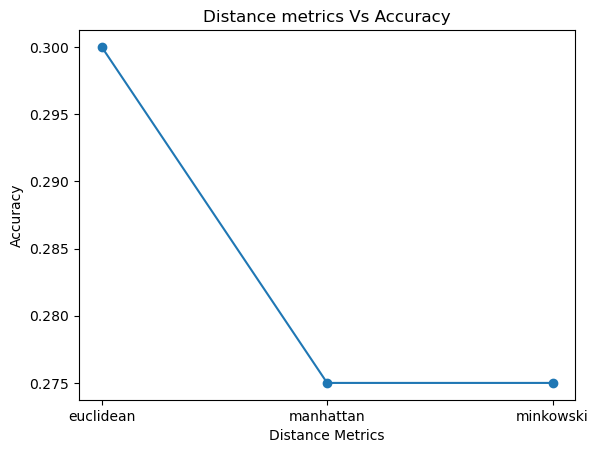

In [8]:
from sklearn.metrics import accuracy_score as a_s
methods=["euclidean","manhattan","minkowski"]
Accuracies=[a_s(y_test,model_euclidean.predict(X_test)),
            a_s(y_test,model_manhattan.predict(X_test)),
            a_s(y_test,model_minkowski.predict(X_test))]

plt.plot(methods,Accuracies,marker='o')
plt.title("Distance metrics Vs Accuracy")
plt.xlabel("Distance Metrics")
plt.ylabel("Accuracy")
plt.show()

### K-Value Vs Accuracy

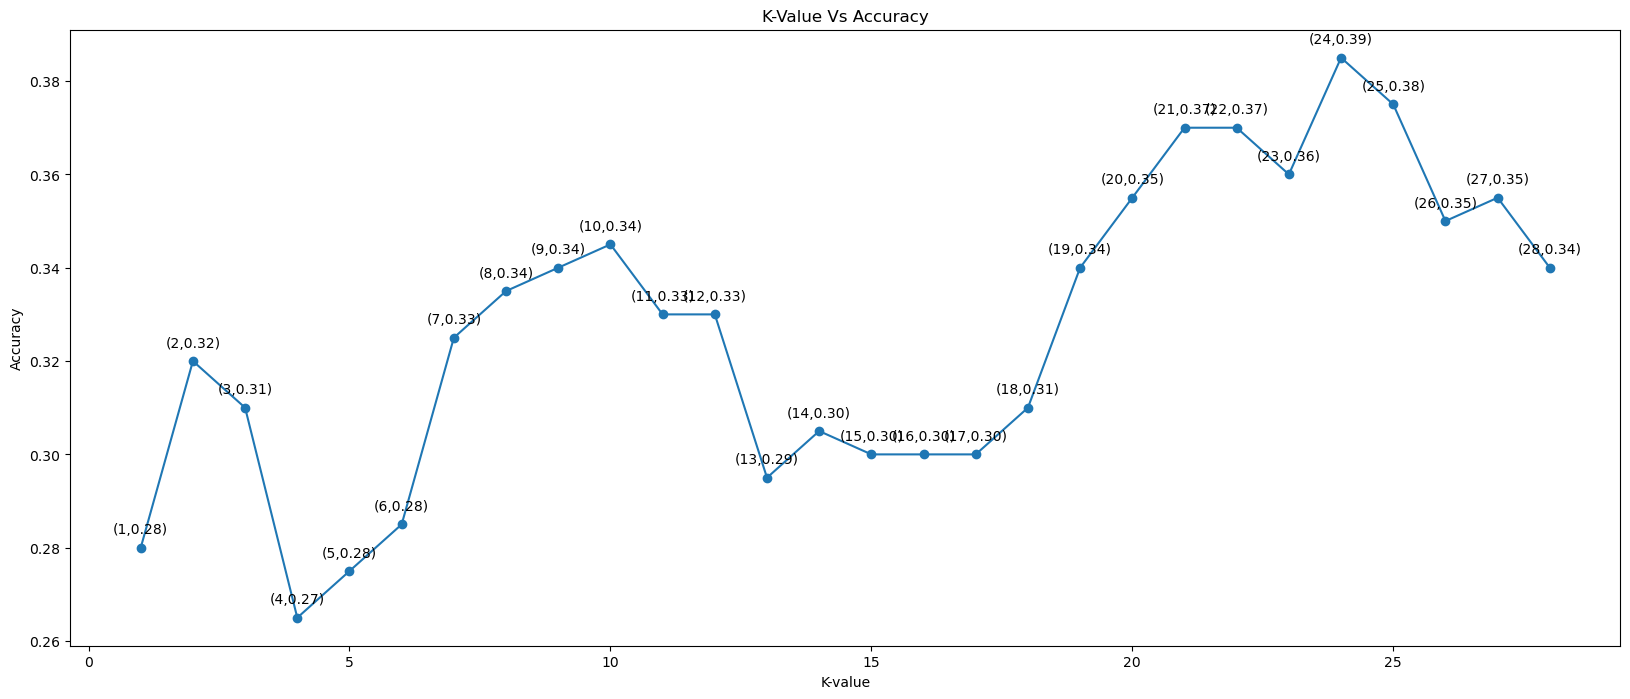

In [9]:
k_values=[i for i in range(1,29)]
accuracies=[]
for i in range(1,29):
    model = KNeighborsClassifier(n_neighbors = i,metric='manhattan')
    model.fit(X_train,y_train)
    accuracies.append(a_s(y_test,model.predict(X_test)))
plt.figure(figsize = (20,8))
plt.plot(k_values,accuracies,marker='o')
for i, acc in enumerate(accuracies):
    plt.annotate(f'({k_values[i]},{acc:.2f})',  # Format accuracy to 2 decimal places
                 (k_values[i], acc),  # The (x, y) coordinates of the annotation
                 textcoords="offset points",
                 xytext=(0, 10),   # Offset text above the point
                 ha='center'       # Center the text horizontally
                 )
plt.title("K-Value Vs Accuracy")
plt.xlabel("K-value")
plt.ylabel("Accuracy")
plt.show()

In [28]:
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=29,metric='manhattan')
knn.fit(X_train_pca, y_train)
y_pred = knn.predict(X_test_pca)

print(cr(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.35      0.51      0.41        51
           2       0.30      0.18      0.23        44
           3       0.30      0.43      0.35        54
           4       0.27      0.12      0.16        51

    accuracy                           0.32       200
   macro avg       0.30      0.31      0.29       200
weighted avg       0.30      0.32      0.29       200



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
C:\Users\admin\AppData\Local\Temp\ipykernel_16324\2842903549.py:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(finaldf['pc1'], finaldf['pc2'], c=y_pred, cmap=plt.cm.get_cmap('viridis', 2), marker='o', s=10)


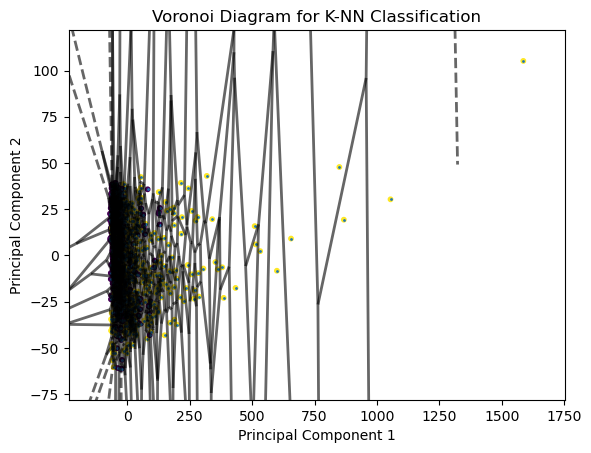

In [31]:
from scipy.spatial import Voronoi, voronoi_plot_2d

principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data=principalComponents, columns=['pc1', 'pc2'])

finaldf = pd.concat([principalDf, df[[target]]], axis=1)
points = finaldf[['pc1', 'pc2']].values

y_pred = knn.predict(finaldf[['pc1', 'pc2']])


vor = Voronoi(points)

fig = voronoi_plot_2d(vor, show_vertices=False, line_colors='k', line_width=2, line_alpha=0.6, point_size=2)

plt.scatter(finaldf['pc1'], finaldf['pc2'], c=y_pred, cmap=plt.cm.get_cmap('viridis', 2), marker='o', s=10)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Voronoi Diagram for K-NN Classification')
plt.show()